In [1]:
import  numpy as np
X = np.load("X2.npy")
y = np.load("y2.npy")

In [2]:
X.shape

(178506, 11, 60)

/data1/tool/anaconda3/envs/tsai/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


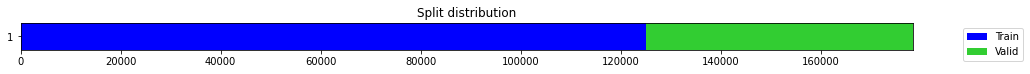

In [3]:
from tsai.all import *

splits = TimeSplitter(0.3)(y) 


In [5]:
X = X.reshape((-1,11*60))
x_train = X[splits[0]]
y_train = y[splits[0]]

x_test = X[splits[1]]
y_test = y[splits[1]]


In [6]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier()
clf.fit(x_train, y_train)

Learning rate set to 0.101218
0:	learn: 0.9428478	total: 390ms	remaining: 6m 29s
1:	learn: 0.8266981	total: 714ms	remaining: 5m 56s
2:	learn: 0.7355414	total: 1.03s	remaining: 5m 43s
3:	learn: 0.6606207	total: 1.38s	remaining: 5m 44s
4:	learn: 0.5988332	total: 1.73s	remaining: 5m 44s
5:	learn: 0.5480030	total: 2.02s	remaining: 5m 35s
6:	learn: 0.5041287	total: 2.35s	remaining: 5m 33s
7:	learn: 0.4663764	total: 2.7s	remaining: 5m 34s
8:	learn: 0.4336657	total: 3.06s	remaining: 5m 37s
9:	learn: 0.4052366	total: 3.41s	remaining: 5m 37s
10:	learn: 0.3803545	total: 3.74s	remaining: 5m 35s
11:	learn: 0.3585966	total: 4.09s	remaining: 5m 37s
12:	learn: 0.3392165	total: 4.45s	remaining: 5m 37s
13:	learn: 0.3219794	total: 4.82s	remaining: 5m 39s
14:	learn: 0.3063297	total: 5.19s	remaining: 5m 40s
15:	learn: 0.2924431	total: 5.58s	remaining: 5m 43s
16:	learn: 0.2800032	total: 5.97s	remaining: 5m 45s
17:	learn: 0.2686069	total: 6.4s	remaining: 5m 48s
18:	learn: 0.2585162	total: 6.75s	remaining: 5

In [7]:
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)
from sklearn import metrics


print('The accuracy of the LGBMClassifier  is:',metrics.accuracy_score(y_test,test_predict))
print('The recall of the LGBMClassifier  is:',metrics.recall_score(y_test,test_predict,average='macro'))

## Check Confusion Matrix (statistical matrix of predicted and true values for each scenario)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

The accuracy of the LGBMClassifier  is: 0.9496003884075291
The recall of the LGBMClassifier  is: 0.7594295000397295
The confusion matrix result:
 [[  836   232     0]
 [  402  2847   504]
 [    0  1561 47170]]


In [8]:
 

import pandas as pd

df = pd.read_csv("all_model_results.csv")
for i in range(df.shape[0]):
    if df['model'].values[i] == 'cat':
        df.loc[i,'acc'] = metrics.accuracy_score(y_test,test_predict)
        df.loc[i,'recall'] = metrics.recall_score(y_test,test_predict,average='macro')
        df.loc[i,'f1'] = metrics.f1_score(y_test,test_predict,average='macro')
        
df.to_csv("all_model_results.csv",index=False)